
# Project: Investigate a Tmdb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset include movies from 1960 until almost 2015, and have a lot of rich information like what movies had low or high budget which movies or tv show was good in this year or that year and a lot of other things we gonna explore.

From this dataset we could try to solve many different questions such as:
  

*   Which genres are most popular from year to year?
*   What kinds of properties are associated with movies that have high revenues?
*   Which director produces the most movies?
*   What is the top 10 most profitable movies?
*   How number of movies released has evloved over time?
*   who are the most profitable directors?

For the analysis included in the notebook i have chosen to look at the following 4 questions:



```
*   Which genres are most popular from year to year?
*   What kinds of properties are associated with movies that have high revenues?
*   Which director produces the most movies?
*   What is the top 10 most profitable movies?
```









In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")



<a id='wrangling'></a>
## Data Wrangling 

In [22]:
data = pd.read_csv(r"/content/tmdb-movies.csv")

data.drop_duplicates(subset=['original_title','popularity'], inplace=True)
# Drop columns that won’t be used in our analysis
data.drop(columns = ['tagline','homepage', 'cast', 'production_companies', 'keywords'], inplace=True)
# Drop the missing value at genres columns
data.dropna(how='any', subset=['genres','director','overview','id','imdb_id'], inplace=True)

# funcation to print describe and info & dublicated data from any dataset
def PrintDesInfo(d):
  # No duplicated row
  print("Numbers Of Dublicated : ",data.duplicated().sum())
  print("   ")
  print(d.describe())
  print("   ")

  print(d.info())

PrintDesInfo(data)

# split the genres string
data.genres = data.genres.str.split('|')


Numbers Of Dublicated :  0
   
                  id    popularity        budget       revenue       runtime  \
count   10793.000000  10793.000000  1.079300e+04  1.079300e+04  10793.000000   
mean    65559.266376      0.649694  1.472068e+07  4.009156e+07    102.223941   
std     91760.206943      1.002707  3.099455e+07  1.173529e+08     30.751141   
min         5.000000      0.000188  0.000000e+00  0.000000e+00      0.000000   
25%     10567.000000      0.209216  0.000000e+00  0.000000e+00     90.000000   
50%     20443.000000      0.385532  0.000000e+00  0.000000e+00     99.000000   
75%     74643.000000      0.718104  1.600000e+07  2.463747e+07    112.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10793.000000  10793.000000  10793.000000  1.079300e+04  1.079300e+04  
mean     218.729454      5.970583   2001.284166  1.766582e+07  5.171065e+07  
std      577.3

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : Which genres are most popular from year to year?

   release_year     genres  popularity
0          1960   Thriller    0.811910
1          1961  Animation    2.631987
2          1962  Adventure    0.942513
3          1963  Animation    2.180410
4          1964        War    0.930959


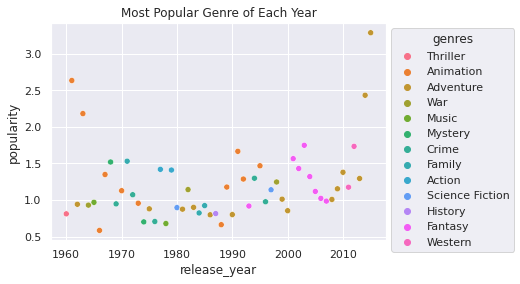

In [6]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# create genre list( create each row for each gen) using explode 
data = data.explode('genres')

# groupby year again and get the largest value
data.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)

# tidy up the data by removing extra row index by reset index
df1 = data.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)
# change the pandas series to pandas dataframe
df1 = df1.reset_index()

print(df1.head(5))

g = sns.scatterplot(x="release_year", y="popularity", hue="genres", data=df1)
g.set_title("Most Popular Genre of Each Year")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

### Research Question 2 : What kinds of properties are associated with movies that have high revenues?

       genres     budget     revenue  net_profit  popularity
0      Action  66.103123  169.886215  103.783092    1.299164
1   Adventure  55.226775  163.500596  108.273822    1.621153
3      Comedy  50.429814  132.172056   81.742242    0.883376
6       Drama  56.544787  130.507679   73.962892    0.860232
17   Thriller  50.022766  117.679517   67.656751    1.035913
   


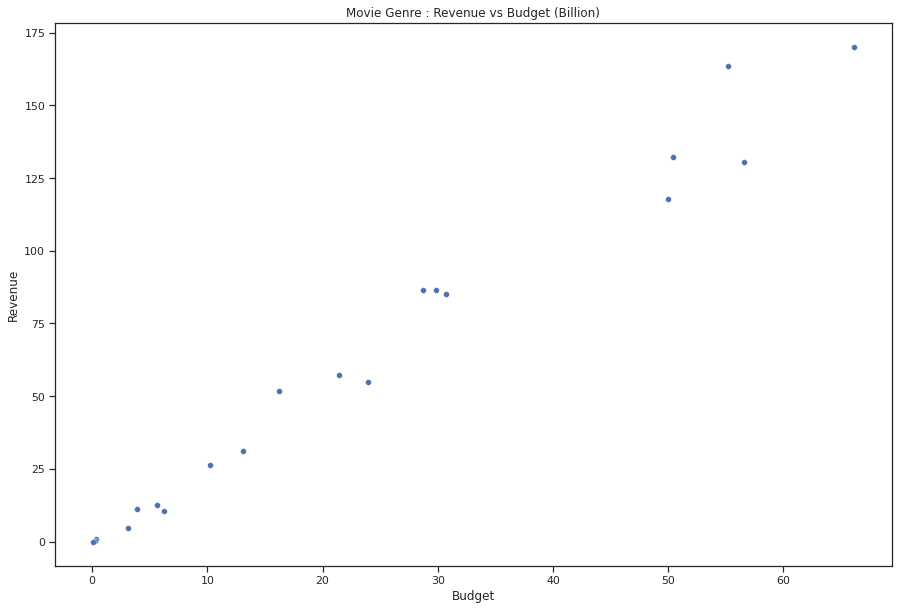

In [7]:
#create new column ---- calculate net profit for each movie
data['net_profit'] = data['revenue'] - data['budget']
#we know budget can't be less than 0, so filter out the dataframe
rev = data[data['budget'] > 0]
# calculate the correlation
#print(rev.corr())

# group the genre 
rev = rev.groupby('genres', as_index =False).agg({'budget':'sum','revenue':'sum','net_profit':'sum','popularity':'mean'})
# sort by highest revenue
rev = rev.sort_values(by='revenue', ascending=False)
#convert revenue in 1 billion unit
rev['revenue'] =rev['revenue']/1000000000
# convert net profit in 1 billion unit
rev['net_profit'] =rev['net_profit']/1000000000
# convert budget in 1 billion unit
rev['budget'] =rev['budget']/1000000000


print(rev.head(5))

# set chart dimension
plt.figure(figsize=(15,10))
# set plotting style
sns.set_style('ticks')
# set title
plt.title('Movie Genre : Revenue vs Budget (Billion)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
# draw scatter plot
sns.scatterplot(x="budget", y="revenue", data=rev)
print("   ")
plt.show()

### Research Question 3 : Which director produces the most movies?

 
Which director produces the most movies?


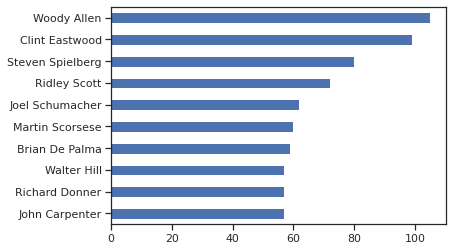

 
The most movies generes made is


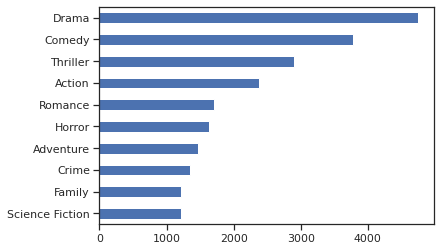

In [17]:
#Funcation to show the most value of any data
def ShowMost(x):    
  MostValues = data[x]
  MostValues.value_counts().head(n=10).sort_values().plot(kind = 'barh')
  plt.show()

print(" ")
print("Which director produces the most movies?")
ShowMost('director')

#we can use this funcation on generes as well
print(" ")
print("The most movies generes made is")
ShowMost('genres')

### Research Question 4 : What is the top 10 most profitable movies?

In [ ]:
profit = data.groupby(['original_title', 'popularity','genres', 'release_year', 'revenue','budget'])['net_profit'].sum()
profit = profit.reset_index().sort_values(by='net_profit', ascending=False)[:35]
# calculate return in investment - ROI
profit['ROI'] = profit['net_profit']/profit['budget']
profit.drop_duplicates(subset=['original_title'], inplace=True)
profit

,original_title,popularity,genres,release_year,revenue,budget,net_profit,ROI
2027,Avatar,9.432768,Action,2009,2781505847,237000000,2544505847,10.736312
18602,Star Wars: The Force Awakens,11.173104,Adventure,2015,2068178225,200000000,1868178225,9.340891
24721,Titanic,4.355219,Drama,1997,1845034188,200000000,1645034188,8.225171
11167,Jurassic World,32.985763,Thriller,2015,1513528810,150000000,1363528810,9.090192
8079,Furious 7,9.335014,Thriller,2015,1506249360,190000000,1316249360,6.927628
19810,The Avengers,7.637767,Science Fiction,2012,1519557910,220000000,1299557910,5.907081
9063,Harry Potter and the Deathly Hallows: Part 2,5.711315,Fantasy,2011,1327817822,125000000,1202817822,9.622543
2036,Avengers: Age of Ultron,5.944927,Science Fiction,2015,1405035767,280000000,1125035767,4.017985
8036,Frozen,6.112766,Animation,2013,1274219009,150000000,1124219009,7.494793
22669,The Net,1.136610,Drama,1995,1106279658,22000000,1084279658,49.285439


<a id='conclusions'></a>
## Conclusions


> **Restults:**

> For our analysis, we found that the movie genres with higher revenues come with higher popularity, higher budget, and higher net profit. We found the same findings when we look at the individual movies with higher revenues. We can conclude that production films are willing to invest more money in popular movies genres. Based on the data, the higher budget will allow firms to produce high-quality movies which generate higher revenue and net profit. As we can see from the top 10 most profitable movies, the return on investments is 4 times to 10.73 times on their budget.

> **Limiations:**

> * Almost every movie has multiple genres, and we have included all the genres during our calculation.
* The missing values in the data will affect our accuracy of analysis, if further investigation is needed, we can perform a statistical test to determine our result whether is statistically significant.



